In [ ]:
import pathlib
import tensorflow as tf

In [ ]:
!tar -xf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

In [ ]:
!git clone --quiet https://github.com/tensorflow/models.git

!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk

!pip install -q Cython contextlib2 pillow lxml matplotlib

!pip install -q pycocotools

%cd models/research
!protoc object_detection/protos/*.proto --python_out=.

%cp object_detection/packages/tf2/setup.py .
!python -m pip install --upgrade pip
!python -m pip install --use-feature=2020-resolver .

Selecting previously unselected package python-bs4.
(Reading database ... 160815 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../4-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../5-python-html5lib_0.999999999-1_all.deb ...
Unpacking pyt

In [ ]:
%cd models/research
!python object_detection/builders/model_builder_tf2_test.py

[Errno 2] No such file or directory: 'models/research'
/content/models/research
2021-07-11 01:23:50.941986: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-07-11 01:23:53.744572: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-11 01:23:53.805893: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-11 01:23:53.806837: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-07-11 

In [ ]:
%cd ..
%cd ..

/content/models
/content


In [ ]:
%mkdir train

In [ ]:
!python model_main_tf2.py \
    --pipeline_config_path=ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/pipeline.config \
    --model_dir=train \
    --alsologtostderr \
    --num_train_steps=20000

2021-07-11 01:28:35.931182: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-11 01:28:38.331114: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-11 01:28:38.363452: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-11 01:28:38.364209: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-07-11 01:28:38.364281: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-11 01:28:38.370700: I tensorflow/stream_executor/plat

In [ ]:
!python model_main_tf2.py \
--model_dir=train \
--pipeline_config_path=ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/pipeline.config \
--checkpoint_dir=train

2021-07-11 03:26:16.234122: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
W0711 03:26:18.379273 140438674478976 model_lib_v2.py:1082] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0711 03:26:18.379469 140438674478976 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0711 03:26:18.379543 140438674478976 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0711 03:26:18.379606 140438674478976 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0711 03:26:18.379697 140438674478976 model_lib_v2.py:1103] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-07-11 03:26:18.383480: I tensorflow/stream_executor/

In [ ]:
%mkdir fine_tuned_model2
%ls

bts_label_map.pbtxt  ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/
exporter_main_v2.py  ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
fine_tuned_model2/   test.record
model_main_tf2.py    train/
models/              train.record
sample_data/


In [ ]:
!python exporter_main_v2.py \
  --input_type=image_tensor \
  --pipeline_config_path=ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/pipeline.config \
  --trained_checkpoint_dir=train \
  --output_directory=fine_tuned_model2

2021-07-11 03:27:48.664478: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-11 03:27:50.632831: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-11 03:27:50.658747: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-11 03:27:50.659383: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-07-11 03:27:50.659428: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-11 03:27:50.662184: I tensorflow/stream_executor/plat

In [ ]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
category_index = label_map_util.create_category_index_from_labelmap('bts_label_map.pbtxt',
                                                                    use_display_name=True)

PATH_TO_SAVED_MODEL="fine_tuned_model2/saved_model"
print('Loading model...', end='')
# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)
print(detect_fn)
print('Done!')

Loading model...<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f2ae8473c50>
Done!


In [ ]:
# img=['/content/_118775305_bts-2.jpeg','/content/bts-lede-2.jpeg', '/content/953019-bts-winterpackage.jpeg',
#      '/content/GettyImages-1202156516.jpeg', '/content/f7edbdd2a3ca0595b07f40617c6a2d36.jpeg',
#      '/content/0bba9d3e-50c4-4cfc-9a41-c896068eef8a-20210308_361_BTS_FINAL.jpeg']
img =['/content/EIHlN1wU4AEwBn0.jpeg', '/content/76683605b7e31c08343e990a9827279d.jpeg']
print(img)

['/content/EIHlN1wU4AEwBn0.jpeg', '/content/76683605b7e31c08343e990a9827279d.jpeg']


Running inference for /content/EIHlN1wU4AEwBn0.jpeg... Done
Running inference for /content/76683605b7e31c08343e990a9827279d.jpeg... Done


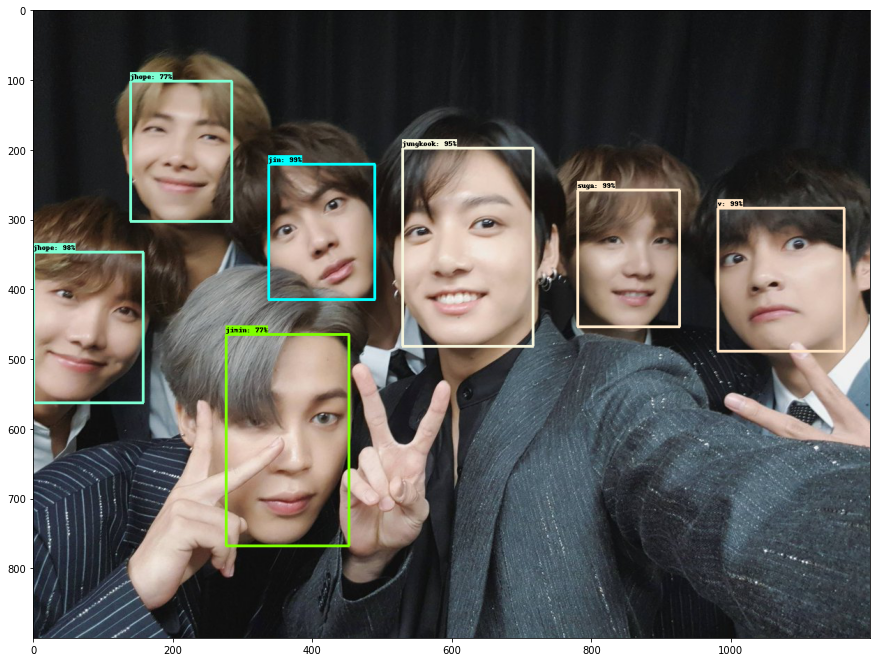

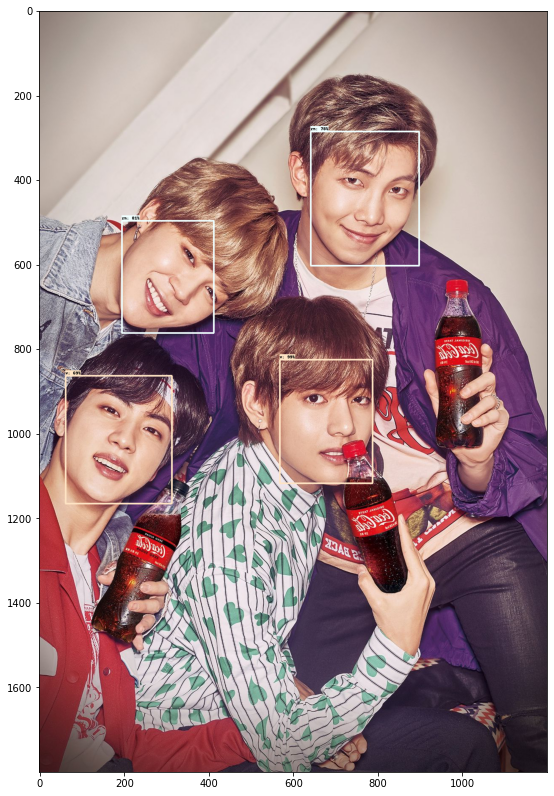

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings
%matplotlib inline

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


for image_path in img:

    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    # input_tensor = input_tensor[tf.newaxis, ...]

    input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)
    # print(detections)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=7,
          min_score_thresh=0.65,
          agnostic_mode=False)
    plt.figure(figsize=(15, 14))
    plt.imshow(image_np_with_detections)
    print('Done') 
plt.show()

# sphinx_gallery_thumbnail_number = 2

In [ ]:
!tar -czf models2.tar.gz fine_tuned_model2

In [ ]:
from google.colab import files
files.download('/content/models2.tar.gz')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>